In [78]:
import os
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Flatten, Dense, Dropout
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image, display

In [79]:
batch_size = 32
epochs = 50

classes = ['gun', 'money', 'ticket', 'herbal_medicine', 'herbal_medicine_raw', 'stock']
nb_classes = len(classes)

img_rows = 100
img_cols = 100
channels = 3

train_data_dir = './data/train'
validation_data_dir = './data/validation'

result_dir = './results'

In [80]:
if not os.path.exists(result_dir):
    os.mkdir(result_dir)

In [81]:
input_tensor = Input(shape=(img_rows,img_cols, channels))
base_model = VGG16(weights='imagenet', input_tensor=input_tensor, include_top=False)

In [82]:
base_model.summary()
#include_topをfalseとすると最終的な出力層に近い部分を除くことができる

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [83]:
x = base_model.output

In [84]:
x = Flatten(input_shape=base_model.output_shape[1:])(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(nb_classes, activation="softmax")(x)

In [85]:
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [86]:
for layer in model.layers[:15]:
    layer.trainable = False

In [87]:
model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
             metrics=["accuracy"])

In [88]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    shear_range = 0.2, #シーア変換
    zoom_range = 0.2, #ランダムにズーム
    rotation_range = 5, #ランダムに回転
    horizontal_flip = True #水平方向に反転
    
)

In [89]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [90]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    color_mode = 'rgb',
    classes = classes,
    class_mode = "categorical",
    batch_size = batch_size,
    shuffle = True
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_rows, img_cols),
    color_mode = 'rgb',
    classes = classes,
    class_mode = "categorical",
    batch_size = batch_size,
    shuffle = True
)

Found 1346 images belonging to 6 classes.
Found 207 images belonging to 6 classes.


In [91]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples//batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples//batch_size
)

Epoch 1/50
42/42 [==============================] - 513s 12s/step - loss: 1.7089 - acc: 0.2993 - val_loss: 1.3446 - val_acc: 0.5312
Epoch 2/50
42/42 [==============================] - 510s 12s/step - loss: 1.2677 - acc: 0.5037 - val_loss: 0.9081 - val_acc: 0.7604
Epoch 3/50
42/42 [==============================] - 495s 12s/step - loss: 1.0246 - acc: 0.6372 - val_loss: 0.6810 - val_acc: 0.8490
Epoch 4/50
42/42 [==============================] - 432s 10s/step - loss: 0.8075 - acc: 0.7024 - val_loss: 0.5194 - val_acc: 0.8542
Epoch 5/50
42/42 [==============================] - 254s 6s/step - loss: 0.6602 - acc: 0.7594 - val_loss: 0.4649 - val_acc: 0.8490
Epoch 6/50
42/42 [==============================] - 246s 6s/step - loss: 0.6030 - acc: 0.7754 - val_loss: 0.4415 - val_acc: 0.8646
Epoch 7/50
42/42 [==============================] - 806s 19s/step - loss: 0.5828 - acc: 0.8088 - val_loss: 0.3826 - val_acc: 0.8802
Epoch 8/50
42/42 [==============================] - 232s 6s/step - loss: 0.515

In [97]:
train_generator.samples

1346

In [98]:
history.history

{'acc': [0.30593607305936071,
  0.50380517503805178,
  0.65144596651445963,
  0.70238095238095233,
  0.74844236760124616,
  0.78158295281582957,
  0.80877976190476186,
  0.81354642313546421,
  0.81659056316590561,
  0.82788161993769471,
  0.84322678843226784,
  0.84246575342465757,
  0.85235920852359204,
  0.85540334855403344,
  0.86309523809523814,
  0.87616822429906538,
  0.87062404870624044,
  0.86755952380952384,
  0.88629283489096577,
  0.89802130898021304,
  0.87595129375951297,
  0.90106544901065444,
  0.88541666666666663,
  0.89641744548286606,
  0.9017857142857143,
  0.89875389408099693,
  0.90106544901065444,
  0.90327380952380953,
  0.91628614916286144,
  0.92313546423135462,
  0.90965732087227413,
  0.91592261904761907,
  0.9147640791476408,
  0.93074581430745817,
  0.91248097412480977,
  0.9299847792998478,
  0.92922374429223742,
  0.9269406392694064,
  0.93455098934550984,
  0.93226788432267882,
  0.92846270928462704,
  0.94140030441400302,
  0.94292237442922378,
  0.9429

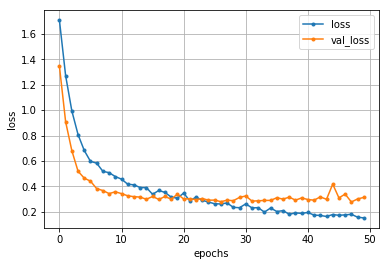

In [99]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(epochs), loss, marker='.', label="loss")
plt.plot(range(epochs), val_loss, marker='.', label="val_loss")
plt.legend(loc="best")
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


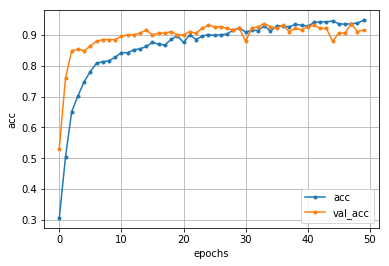

In [100]:
loss = history.history['acc']
val_loss = history.history['val_acc']

plt.plot(range(epochs), loss, marker='.', label="acc")
plt.plot(range(epochs), val_loss, marker='.', label="val_acc")
plt.legend(loc="best")
plt.grid()
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()


In [137]:
import os

In [139]:
RESULT_PATH = "./results"
if not os.path.exists(RESULT_PATH):
    os.mkdir(RESULT_PATH)


In [140]:
#モデルの保存
model_json = model.to_json() # dictionary like json format
model_path = os.path.join(RESULT_PATH, "model.json")
with open(model_path, "w") as json_file:
    json_file.write(model_json)

In [141]:
#重みの保存
weights_path = os.path.join(RESULT_PATH, "weights.hdf5")
model.save_weights(weights_path)

In [142]:
#モデルの読み込み
from keras.models import model_from_json

#load_model
json_file = open(model_path, "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [143]:
#重みの読み込み
loaded_model.load_weights(weights_path)

In [144]:
loaded_model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
             metrics=["accuracy"])

In [145]:
def predict_loaded(img_file_path):
    display(Image(img_file_path, width=150, unconfined=True))
    img = image.load_img(img_file_path, target_size=(img_rows, img_cols))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    x = x/255.0
    
    pred = loaded_model.predict(x)[0]
    
    top = 5
    
    top_indices = pred.argsort()[-top:][::-1]
    result = [(classes[i], pred[i]) for i in top_indices]
    for x in result:
        print(x)

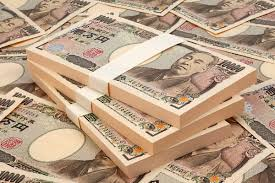

('money', 0.9424513)
('ticket', 0.056501769)
('gun', 0.00040911342)
('herbal_medicine_raw', 0.00039171439)
('stock', 0.0001707874)


In [146]:
predict('./data/sample/money_sample.jpg')

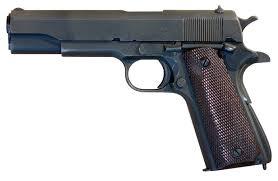

('gun', 0.99990737)
('ticket', 4.1902622e-05)
('money', 4.0663796e-05)
('stock', 7.5410658e-06)
('herbal_medicine', 1.9282538e-06)


In [147]:
predict('./data/sample/gun_sample.jpg')

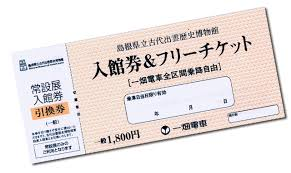

('stock', 0.58194399)
('ticket', 0.40478811)
('herbal_medicine', 0.0077918801)
('money', 0.0047516297)
('herbal_medicine_raw', 0.00051976688)


In [148]:
predict('./data/sample/ticket_sample.jpg')

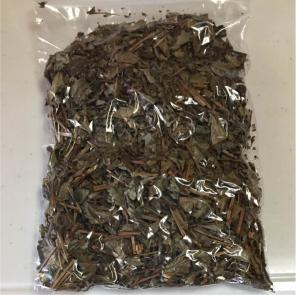

('herbal_medicine_raw', 0.48849618)
('money', 0.22445662)
('stock', 0.16165185)
('ticket', 0.12066682)
('herbal_medicine', 0.003524519)


In [149]:
predict('./data/sample/herbal_medicine_raw_sample.jpg')

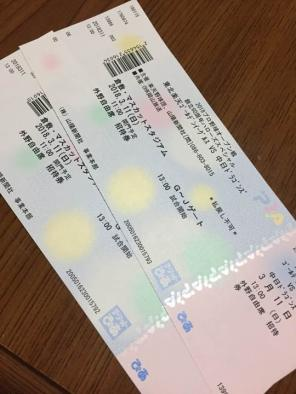

('stock', 0.84409565)
('ticket', 0.15406695)
('money', 0.0012282765)
('herbal_medicine', 0.00036054521)
('herbal_medicine_raw', 0.0001518542)


In [150]:
predict('./data/sample/ticket2_sample.jpg')

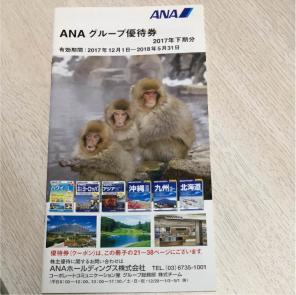

('stock', 0.93575943)
('ticket', 0.039670609)
('herbal_medicine', 0.012744161)
('money', 0.0095681446)
('herbal_medicine_raw', 0.0021210038)


In [151]:
predict('./data/sample/stock_sample.jpg')

In [152]:
#requset

In [161]:
import requests
send_data = './data/sample/stock_sample.jpg'
r = requests.post("http://localhost:8080/predict/img_file_path", json=send_data)

# trial

In [165]:
from flask import jsonify, make_response

In [173]:
def predict_json(img_file_path):
    display(Image(img_file_path, width=150, unconfined=True))
    img = image.load_img(img_file_path, target_size=(img_rows, img_cols))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    x = x/255.0
    
    pred = loaded_model.predict(x)[0]
    
    top = 5
    
    top_indices = pred.argsort()[-top:][::-1]
    result = [(classes[i], pred[i]) for i in top_indices]
    result = jsonify(result)
    return result

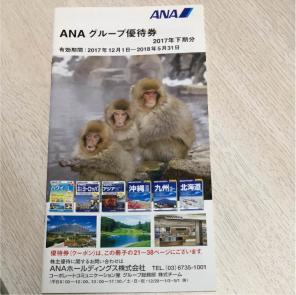

RuntimeError: Working outside of application context.

This typically means that you attempted to use functionality that needed
to interface with the current application object in a way.  To solve
this set up an application context with app.app_context().  See the
documentation for more information.

In [174]:
predict_json('./data/sample/stock_sample.jpg')

In [133]:
from sklearn.externals import joblib

In [134]:
joblib.dump(loaded_model, "choose_class.pkl")
joblib.dump(['gun', 'money', 'ticket', 'herbal_medicine', 'herbal_medicine_raw', 'stock'], "choose_class_cols.pkl")

TypeError: can't pickle _thread.lock objects

In [116]:
def predict(img_file_path):
    display(Image(img_file_path, width=150, unconfined=True))
    img = image.load_img(img_file_path, target_size=(img_rows, img_cols))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    x = x/255.0
    
    pred = model.predict(x)[0]
    
    top = 5
    
    top_indices = pred.argsort()[-top:][::-1]
    result = [(classes[i], pred[i]) for i in top_indices]
    for x in result:
        print(x)

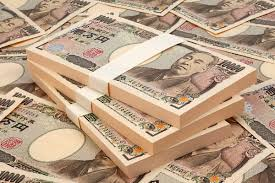

('money', 0.9424513)
('ticket', 0.056501769)
('gun', 0.00040911342)
('herbal_medicine_raw', 0.00039171439)
('stock', 0.0001707874)


In [117]:
predict('./data/sample/money_sample.jpg')

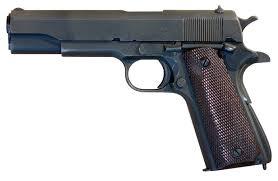

('gun', 0.99990737)
('ticket', 4.1902622e-05)
('money', 4.0663796e-05)
('stock', 7.5410658e-06)
('herbal_medicine', 1.9282538e-06)


In [118]:
predict('./data/sample/gun_sample.jpg')

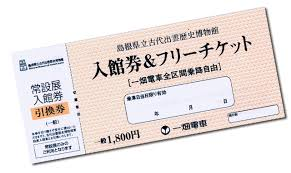

('stock', 0.58194399)
('ticket', 0.40478811)
('herbal_medicine', 0.0077918801)
('money', 0.0047516297)
('herbal_medicine_raw', 0.00051976688)


In [119]:
predict('./data/sample/ticket_sample.jpg')